In [12]:
import datetime
# path = "mnt/out" #moved to local just in case
path="FRAN_RODRIGO_TESTS/out"


DEBUG = False

def read_file(filename):
    timestamps =[]
    temperatures =[]
    with open(filename, "r") as f:
        lines = f.readlines()
    
    for i in range(len(lines)):#first line is always channel line
        
        # extract timestamp and temperature values
        parts = lines[i].split()
        if DEBUG:print(parts)
        
        if len(parts)<2:continue
        timestamp = float(parts[1])
        temperature = float(parts[2])

        # add values to the corresponding lists
        timestamps.append(timestamp)
        temperatures.append(temperature)

    if DEBUG:
        print("Timestamps:", timestamps    )
        print("Temperatures:", temperatures)
    dates = [datetime.datetime.fromtimestamp(date) for date in timestamps]
    return dates, temperatures

def read_channels(filename,channels):
    dates = []
    temperatures = []
    for ch in channels:
        d,t = read_file(filename+str(ch))
        dates.append(d)
        temperatures.append(t)
    return dates, temperatures


(19483.0, 19484.0)

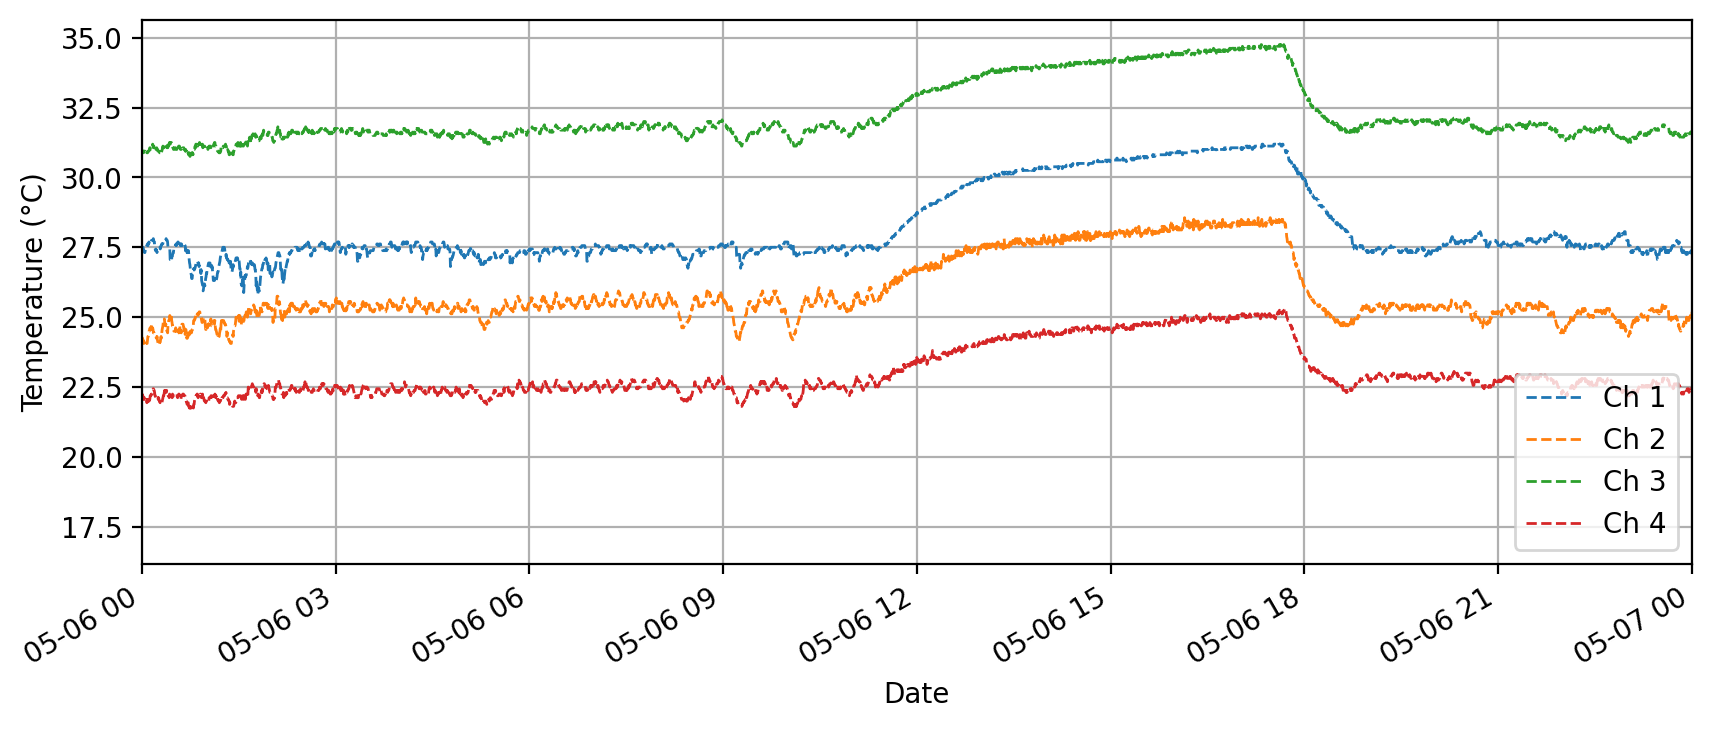

In [15]:
%matplotlib inline
dates, temperatures=read_channels(path,[1,2,3,4])
import matplotlib.pyplot as plt
plt.figure(dpi=200,figsize=(10,4))
for ch in [1,2,3,4]:
    ch-=1;
    plt.plot(dates[ch], temperatures[ch],'--', label="Ch {}".format(ch+1),linewidth=1)
plt.gcf().autofmt_xdate()

plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend(loc="lower right")
plt.grid()
# plt.ylim(25, 30)


plt.xlim([datetime.date(2023, 5, 6), datetime.date(2023, 5, 7)])


(19515.75, 19516.541666666668)

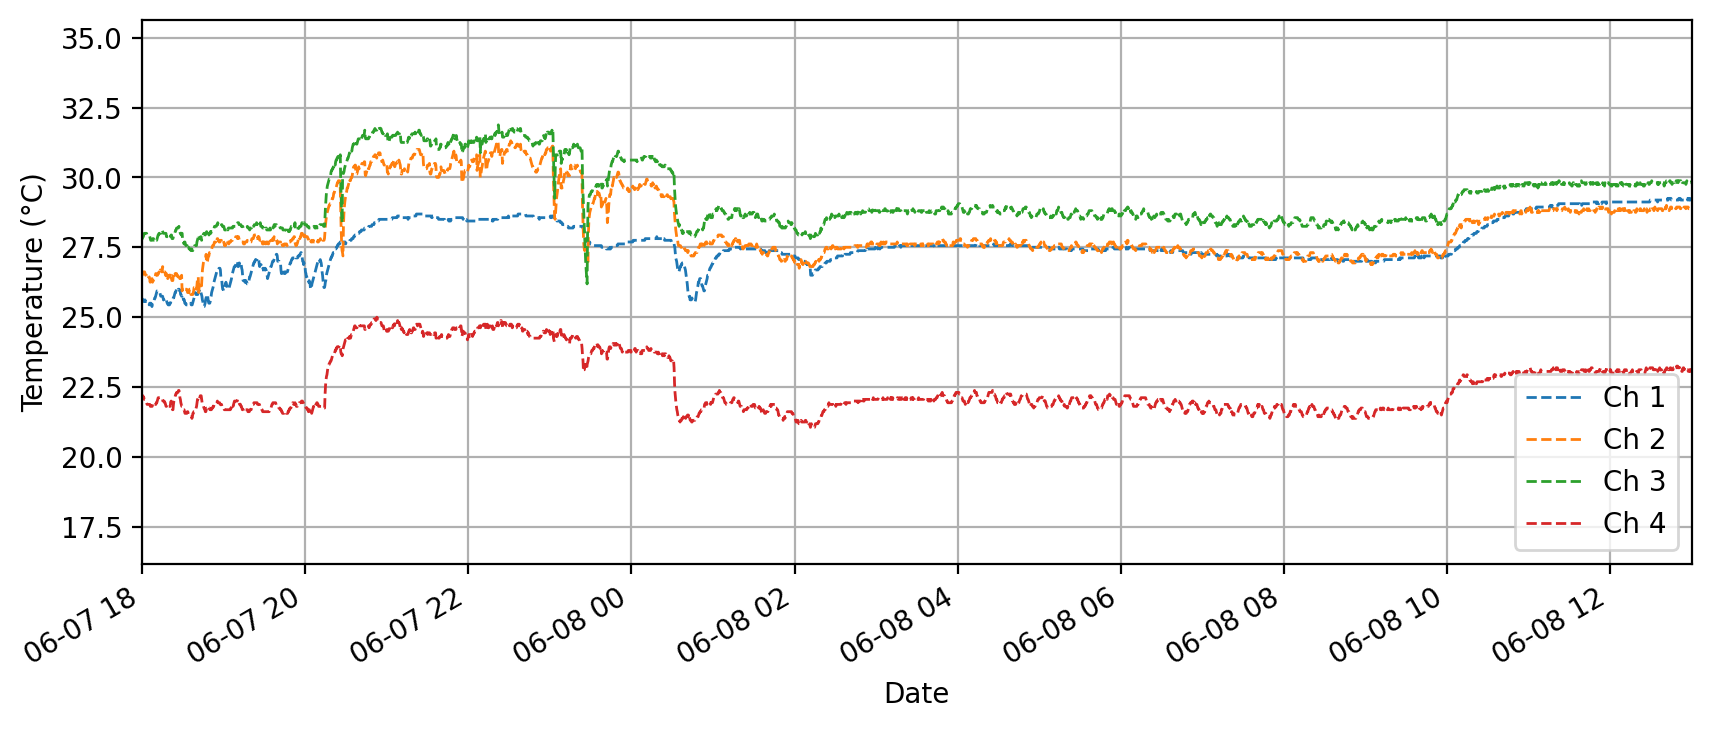

In [16]:
%matplotlib inline
plt.figure(dpi=200,figsize=(10,4))
for ch in [1,2,3,4]:
    ch-=1;
    TEMP= [t for t0,t in zip(temperatures[0],temperatures[ch])]

    plt.plot(dates[ch][:len(TEMP)],TEMP  ,'--', label="Ch {}".format(ch+1),linewidth=1)
plt.gcf().autofmt_xdate()

plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend(loc="lower right")
plt.grid()

# Set the x-axis limits
xlim_start = datetime.datetime(2023, 6, 8, 13)
xlim_end   = datetime.datetime  (2023, 6, 7, 18)
plt.xlim(xlim_end,xlim_start)

# plt.ylim(25, 30)
# plt.semilogy()